In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

In [273]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

In [274]:
data = yf.download(stock, start, end)
data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [275]:
data.reset_index(inplace=True)

In [276]:
data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...,...
2756,2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [277]:
ma_100_days = data.Close.rolling(100).mean()

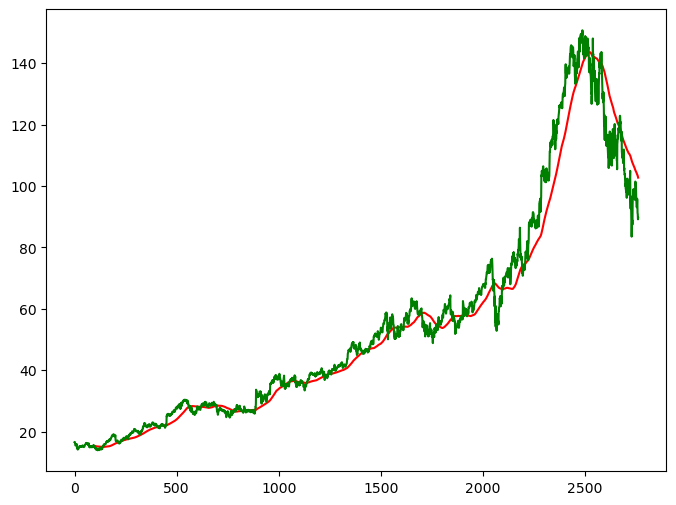

In [278]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [279]:
ma_200_days = data.Close.rolling(200).mean()

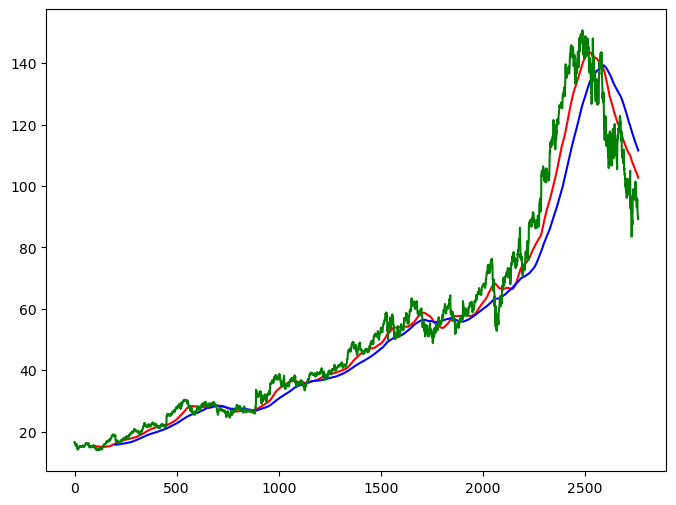

In [280]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [281]:
data.dropna(inplace=True)

In [282]:
# Split data into training and testing sets
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [283]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler.fit_transform(data_train)
data_test_scale = scaler.fit_transform(data_test)

In [284]:
# Prepare data for KNN
X_train = data_train_scale[:-100]  # Features: all but the last 100 prices
y_train = data_train_scale[100:]   # Targets: the next 100 prices
X_test = data_test_scale[:-100]
y_test = data_test_scale[100:]

In [285]:
# Create a KNN model
model = KNeighborsRegressor(n_neighbors=10)  # Adjust n_neighbors as needed

In [286]:
# Fit the KNN model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Invert scaling for predictions
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

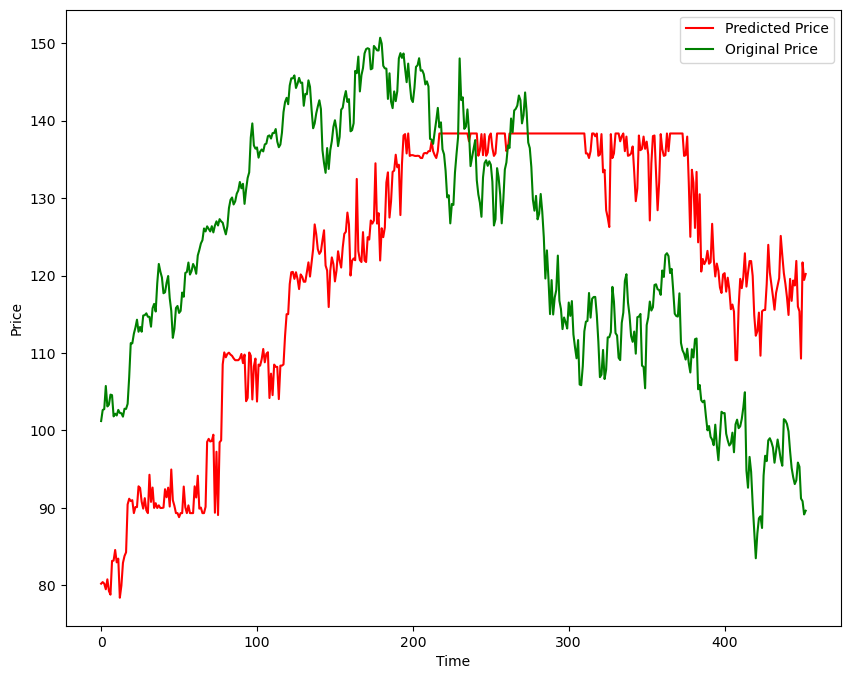

In [287]:
# Visualize predicted vs. actual prices
plt.figure(figsize=(10, 8))
plt.plot(y_pred, 'r', label='Predicted Price')
plt.plot(y_test, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [288]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

MSE: 441.4082
RMSE: 21.0097
MAE: 19.1764
R-squared: -0.5661


In [289]:
import joblib

In [290]:
joblib.dump(model, 'Stock Predictions Model_using_KNN.joblib')


['Stock Predictions Model_using_KNN.joblib']

In [291]:
loaded_model = joblib.load('Stock Predictions Model_using_KNN.joblib')